# Lab 04
# A* Algorithm 
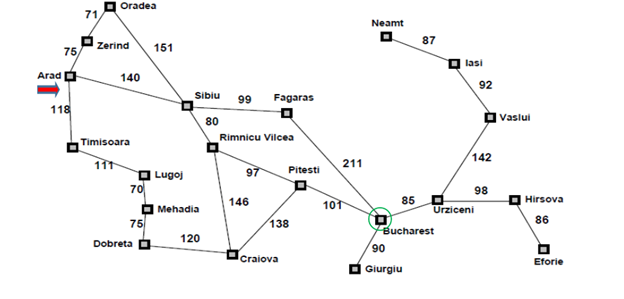

**Node Class**

In [117]:

class Node:
    def __init__(self, name, parent, g, h, f):                                          # Initializing the class
        self.name = name
        self.parent = parent
        self.g = g                                                                      # Distance to start node
        self.h = h                                                                      # Distance to goal node
        self.f = f                                                                      # Total cost
            
    def __eq__(self, other):                                                            # Comparing two nodes
        return self.name == other.name
    
    def __lt__(self, other):                                                            # Sorting nodes
        return self.f < other.f
    
    def __repr__(self):                                                                 # Printing nodes
        return ('({0},{1})'.format(self.name, self.f))
    
    def printNode(self):                                                                # Customized Printing of nodes
        print(self.name, end = " - ")
        print(self.parent, end = " : ")
        print(self.g, end = " : ")
        print(self.h, end=" : ")
        print(self.f)


**Graph Class**

In [118]:
class Graph:
    
    def __init__(self, graph_dict=None, directed=True):                                 # Initialize the class
        self.graph_dict = graph_dict or {}
        self.directed = directed
        if not directed:
            self.make_undirected()
                
    def make_undirected(self):                                                          # Create an undirected graph by adding symmetric edges
        for a in list(self.graph_dict.keys()):
            for (b, dist) in self.graph_dict[a].items():
                self.graph_dict.setdefault(b, {})[a] = dist
                    
    def connect(self, A, B, distance=1):                                                # Add a link from A and B of given distance, and also add the inverse link if the graph is undirected
        self.graph_dict.setdefault(A, {})[B] = distance
        if not self.directed:
            self.graph_dict.setdefault(B, {})[A] = distance
               
    def get(self, a, b=None):                                                           # Get neighbors or a neighbor: {'Zerind': 75, 'Sibiu': 140, 'Timisoara': 118}
        links = self.graph_dict.setdefault(a, {})
        if b is None:
            return links
        else:
            return links.get(b)
            
    def nodes(self):                                                                    # Return a list of nodes in the graph
        s1 = set([k for k in self.graph_dict.keys()])
        s2 = set([k2 for v in self.graph_dict.values() for k2, v2 in v.items()])
        nodes = s1.union(s2)
        return list(nodes)

    def getNode(self, city, heuristics, end):                                           # Get a specific neighbour which has minimum cost
        nodes = list()
        min = 999
        for (b,dist) in self.graph_dict[city].items():
            if(b == end):
                return Node(city, b, dist, heuristics[b], dist+heuristics[b] )
            nodes.append(Node(city, b, dist, heuristics[b], dist+heuristics[b] ))
            if (dist+heuristics[b]) < min:
                min = dist+heuristics[b]
                minnode = Node(city, b, dist, heuristics[b], dist+heuristics[b] )       
        return minnode
        
    def printgraph(self):                                                               # Function to print each edge in the entire graph
         for a in list(self.graph_dict.keys()):
            for (b, dist) in self.graph_dict[a].items():
                print(self.graph_dict.setdefault(a,{})[b], end = " : ")
                print(a, end = " - ")
                print(b)

**A* Implementation**

In [119]:
#implement A* here 
class A_Star:
    def __init__(self, graph, heuristics, source, goal):
        self.graph = graph
        self.heuristics = heuristics
        self.source = source
        self.goal = goal
        self.open_list = [source]
        self.closed_list = []
        self.path = []
        
    def getNext(self, current_node):
        neighbours = [list(x) for x in self.graph.get(current_node).items()]  # {'Zerind': 75, 'Sibiu': 140, 'Timisoara': 118}
        for i,neighbour in enumerate(neighbours):
            neighbours[i].append(neighbour[1]+self.heuristics[neighbour[0]])       # [['Zerind', 449], ['Sibiu', 393], ['Timisoara', 447]]
        mininode = []
        for n,g,f in neighbours:
            if mininode == [] or f < mininode[2]:
                mininode = [n,g,f]
        return mininode
                
    def driver(self):
        current_node = self.source
        self.path.append((self.source, 0))
        cost = 0
        while True:
            next_node = self.getNext(current_node)
            cost += next_node[1]
            self.path.append((next_node[0],cost))
            if next_node[0] == self.goal:
                break
            else:
                current_node = next_node[0]
        print("FINAL COST -> ",cost)
    

**Main Function**

In [120]:
# The main entry point for this module
def main():
    # Create a graph
    graph = Graph()
        
   # Create graph connections (Actual distance)
    graph.connect('Arad', 'Zerind', 75)
    graph.connect('Arad', 'Sibiu', 140)
    graph.connect('Arad', 'Timisoara', 118)
    graph.connect('Zernid', 'Oradea', 71)
    graph.connect('Oradea', 'Sibiu', 151)
    graph.connect('Sibiu', 'Fagaras', 99)
    graph.connect('Sibiu', 'Rimnicu Vilcea', 80)
    graph.connect('Fagaras', 'Bucharest', 211)
    graph.connect('Bucharest', 'Pitesti', 101)
    graph.connect('Pitesti', 'Rimnicu Vilcea', 97)
    graph.connect('Pitesti', 'Craiova', 138)
    graph.connect('Craiova', 'Rimnicu Vilcea', 146)
    graph.connect('Craiova', 'Dobreta', 120)
    graph.connect('Dobreta', 'Mehadia', 75)
    graph.connect('Mehadia', 'Lugoj', 70)
    graph.connect('Lugoj', 'Timisoara', 111)
    graph.connect('Bucharest', 'Giurgiu', 90)
    graph.connect('Bucharest', 'Urziceni', 85)
    graph.connect('Urziceni', 'Hirsova', 98)
    graph.connect('Urziceni', 'Vaslui', 142)
    graph.connect('Hirsova', 'Eforie', 86)
    graph.connect('Vaslui', 'Lasi', 92)
    graph.connect('Lasi', 'Neamt', 87)


    # Add Remaining Links From Example Given in Sides (Romania Map)
        
        
    # Make graph undirected, create symmetric connections
    graph.make_undirected()
        
    # Create heuristics (straight-line distance, air-travel distance) for Destination Bucharest
 
    heuristics = {}
    heuristics['Arad'] = 366
    heuristics['Bucharest'] = 0
    heuristics['Craiova'] = 160
    heuristics['Dobreta'] = 242
    heuristics['Fagaras'] = 176
    heuristics['Lugoj'] = 244
    heuristics['Mehadia'] = 241
    heuristics['Oradea'] = 380
    heuristics['Pitesti'] = 10
    heuristics['Rimnicu Vilcea'] = 193
    heuristics['Sibiu'] = 253
    heuristics['Timisoara'] = 329
    heuristics['Zerind'] = 374
    heuristics['Giurgiu'] = 77
    
    
    
    # Print Graph Nodes
    graph.printgraph()
    print("--------------------------------\n\n")
    # print(graph.nodes())
    # print(graph.graph_dict)
    # Run search algorithm
    a_star = A_Star(graph, heuristics, 'Arad', 'Bucharest')        
    a_star.driver()
    print("PATH: " ,a_star.path)

# Tell python to run main method
if __name__ == "__main__": main()

75 : Arad - Zerind
140 : Arad - Sibiu
118 : Arad - Timisoara
71 : Zernid - Oradea
151 : Oradea - Sibiu
71 : Oradea - Zernid
99 : Sibiu - Fagaras
80 : Sibiu - Rimnicu Vilcea
140 : Sibiu - Arad
151 : Sibiu - Oradea
211 : Fagaras - Bucharest
99 : Fagaras - Sibiu
101 : Bucharest - Pitesti
90 : Bucharest - Giurgiu
85 : Bucharest - Urziceni
211 : Bucharest - Fagaras
97 : Pitesti - Rimnicu Vilcea
138 : Pitesti - Craiova
101 : Pitesti - Bucharest
146 : Craiova - Rimnicu Vilcea
120 : Craiova - Dobreta
138 : Craiova - Pitesti
75 : Dobreta - Mehadia
120 : Dobreta - Craiova
70 : Mehadia - Lugoj
75 : Mehadia - Dobreta
111 : Lugoj - Timisoara
70 : Lugoj - Mehadia
98 : Urziceni - Hirsova
142 : Urziceni - Vaslui
85 : Urziceni - Bucharest
86 : Hirsova - Eforie
98 : Hirsova - Urziceni
92 : Vaslui - Lasi
142 : Vaslui - Urziceni
87 : Lasi - Neamt
92 : Lasi - Vaslui
75 : Zerind - Arad
118 : Timisoara - Arad
111 : Timisoara - Lugoj
80 : Rimnicu Vilcea - Sibiu
97 : Rimnicu Vilcea - Pitesti
146 : Rimnicu Vilc